## Case Study: National Occupational mean wage

In this chapter, you will apply the skills you have learned to explore how the average salary amongst professions have changed over time.

### Initial exploration of the data
You are presented with data from the Occupational Employment Statistics (OES) program which produces employment and wage estimates annually. This data contains the yearly average income from 2001 to 2016 for 22 occupation groups. You would like to use this data to identify clusters of occupations that maintained similar income trends.

The data is stored in your environment as the data.matrix oes.

Before you begin to cluster this data you should determine whether any pre-processing steps (such as scaling and imputation) are necessary.

Leverage the functions head() and summary() to explore the oes data in order to determine which of the pre-processing steps below are necessary:

In [1]:
oes <- readRDS("oes.rds")

head(oes)

summary(oes)

,2001,2002,2003,2004,2005,2006,2007,2008,2010,2011,2012,2013,2014,2015,2016
Management,70800,78870,83400,87090,88450,91930,96150,100310,105440,107410,108570,110550,112490,115020,118020
Business Operations,50580,53350,56000,57120,57930,60000,62410,64720,67690,68740,69550,71020,72410,73800,75070
Computer Science,60350,61630,64150,66370,67100,69240,72190,74500,77230,78730,80180,82010,83970,86170,87880
Architecture/Engineering,56330,58020,60390,63060,63910,66190,68880,71430,75550,77120,79000,80100,81520,82980,84300
Life/Physical/Social Sci.,49710,52380,54930,57550,58030,59660,62020,64280,66390,67470,68360,69400,70070,71220,72930
Community Services,34190,34630,35800,37050,37530,39000,40540,41790,43180,43830,44240,44710,45310,46160,47200


      2001            2002            2003            2004      
 Min.   :16720   Min.   :17180   Min.   :17400   Min.   :17620  
 1st Qu.:26728   1st Qu.:27393   1st Qu.:27858   1st Qu.:28535  
 Median :34575   Median :35205   Median :36180   Median :37335  
 Mean   :37850   Mean   :39701   Mean   :41018   Mean   :42275  
 3rd Qu.:49875   3rd Qu.:53108   3rd Qu.:55733   3rd Qu.:57443  
 Max.   :70800   Max.   :78870   Max.   :83400   Max.   :87090  
      2005            2006            2007            2008       
 Min.   :17840   Min.   :18430   Min.   :19440   Min.   : 20220  
 1st Qu.:29043   1st Qu.:29688   1st Qu.:30810   1st Qu.: 31643  
 Median :37790   Median :39030   Median :40235   Median : 41510  
 Mean   :42775   Mean   :44329   Mean   :46074   Mean   : 47763  
 3rd Qu.:58005   3rd Qu.:59915   3rd Qu.:62313   3rd Qu.: 64610  
 Max.   :88450   Max.   :91930   Max.   :96150   Max.   :100310  
      2010             2011             2012             2013       
 Min.   : 2124

### Hierarchical clustering: Occupation trees
In the previous exercise you have learned that the oes data is ready for hierarchical clustering without any preprocessing steps necessary. In this exercise you will take the necessary steps to build a dendrogram of occupations based on their yearly average salaries and propose clusters using a height of 100,000.

Warning message:
"package 'dendextend' was built under R version 3.6.3"
---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:stats':

    cutree



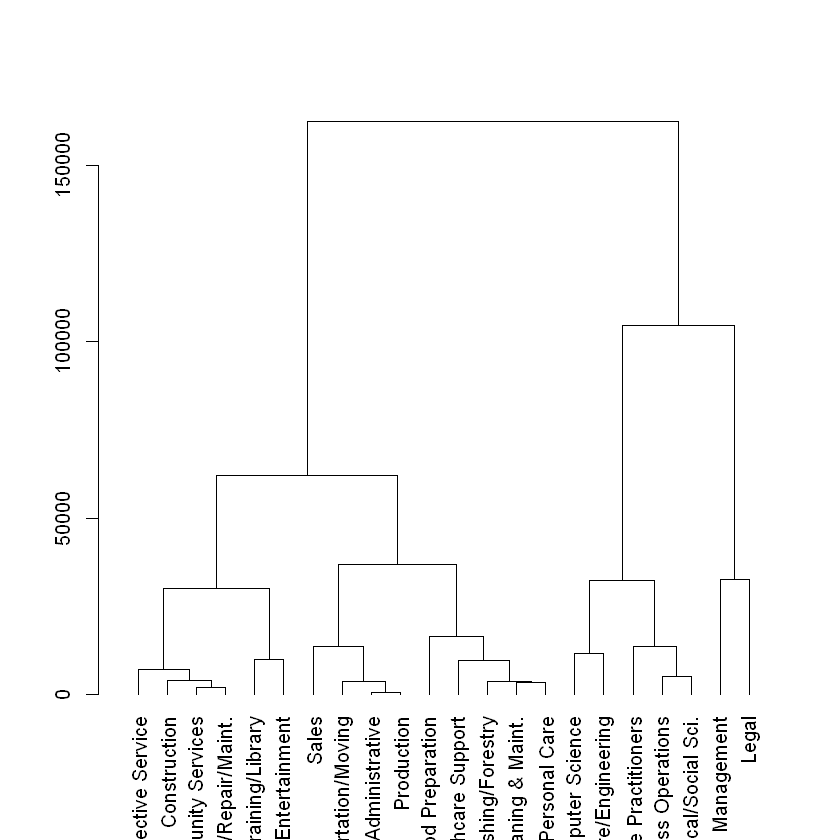

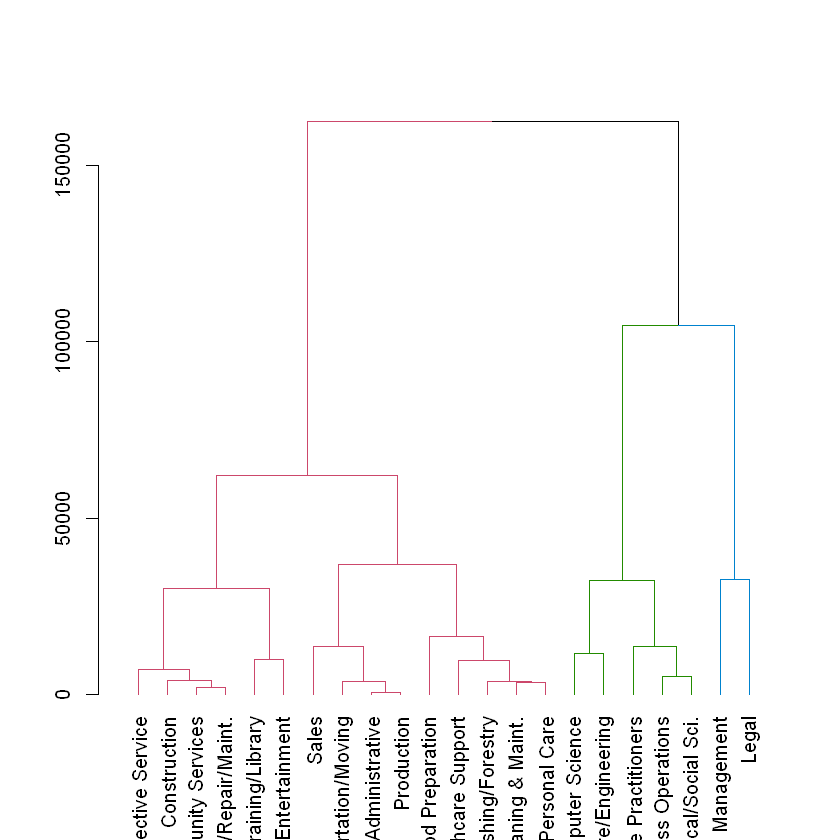

In [3]:
library(dendextend)

# Calculate Euclidean distance between the occupations
dist_oes <- dist(oes, method = "euclidean")

# Generate an average linkage analysis 
hc_oes <- hclust(dist_oes, method = "average")

# Create a dendrogram object from the hclust variable
dend_oes <- as.dendrogram(hc_oes)

# Plot the dendrogram
plot(dend_oes)

# Color branches by cluster formed from the cut at a height of 100000
dend_colored <- color_branches(dend_oes, h = 100000)

# Plot the colored dendrogram
plot(dend_colored)

### Hierarchical clustering: Preparing for exploration
You have now created a potential clustering for the oes data, before you can explore these clusters with ggplot2 you will need to process the oes data matrix into a tidy data frame with each occupation assigned its cluster.

In [7]:
library(tibble)
library(tidyr)
library(dplyr)

# Use rownames_to_column to move the rownames into a column of the data frame
df_oes <- rownames_to_column(as.data.frame(oes), var = 'occupation')

# Create a cluster assignment vector at h = 100,000
cut_oes <- cutree(hc_oes, h = 100000)

# Generate the segmented the oes data frame
clust_oes <- mutate(df_oes, cluster = cut_oes)

# Create a tidy data frame by gathering the year and values into two columns
gathered_oes <- gather(data = clust_oes, 
                       key = year, 
                       value = mean_salary, 
                       -occupation, -cluster)
head(gathered_oes)

occupation,cluster,year,mean_salary
Management,1,2001,70800
Business Operations,2,2001,50580
Computer Science,2,2001,60350
Architecture/Engineering,2,2001,56330
Life/Physical/Social Sci.,2,2001,49710
Community Services,3,2001,34190


### Hierarchical clustering: Plotting occupational clusters
You have succesfully created all the parts necessary to explore the results of this hierarchical clustering work. In this exercise you will leverage the named assignment vector cut_oes and the tidy data frame gathered_oes to analyze the resulting clusters.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Management                      Legal 
                         1                          1 
       Business Operations           Computer Science 
                         2                          2 
  Architecture/Engineering  Life/Physical/Social Sci. 
                         2                          2 
  Healthcare Practitioners         Community Services 
                         2                          3 
Education/Training/Library  Arts/Design/Entertainment 
                         3                          3 
        Healthcare Support         Protective Service 
                         3                          3 
          Food Preparation  Grounds Cleaning & Maint. 
                         3                          3 
             Personal Care                      Sales 
                         3                          3 
     Office Administrative   Farming/Fishing/Forestry 
                         3                          3 
              Construction Installation/Repair/Maint. 
                         3                          3 
                Production      Transportation/Moving 
                         3                          3

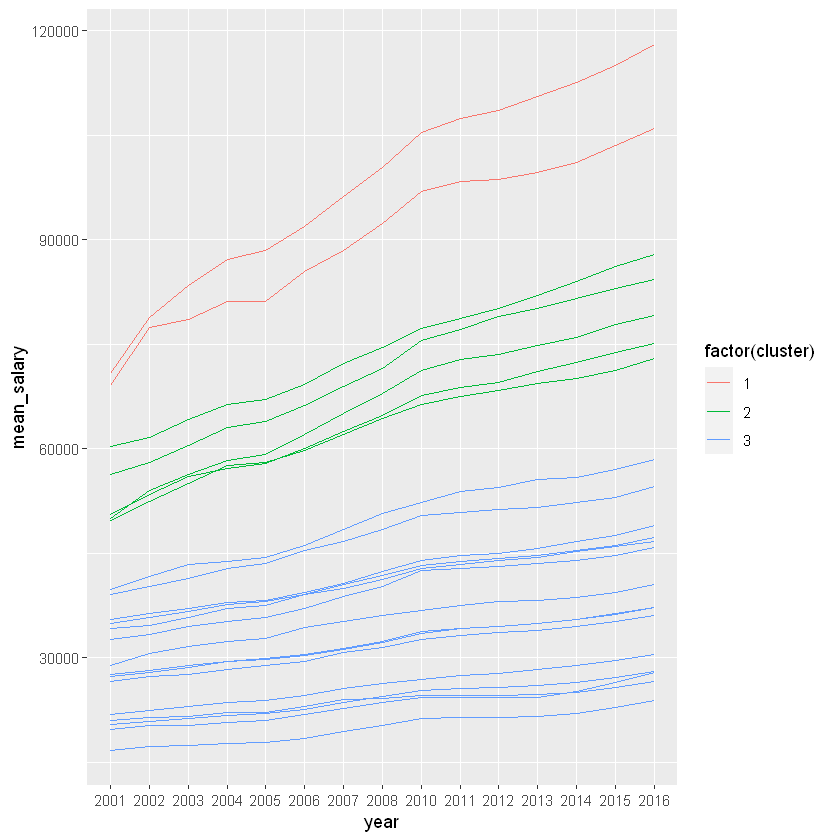

In [9]:
library(ggplot2)
# View the clustering assignments by sorting the cluster assignment vector
sort(cut_oes)

# Plot the relationship between mean_salary and year and color the lines by the assigned cluster
ggplot(gathered_oes, aes(x = year, y = mean_salary, color = factor(cluster))) + 
    geom_line(aes(group = occupation))

### K-means: Elbow analysis
In the previous exercises you used the dendrogram to propose a clustering that generated 3 trees. In this exercise you will leverage the k-means elbow plot to propose the "best" number of clusters.

Warning message:
"package 'purrr' was built under R version 3.6.3"

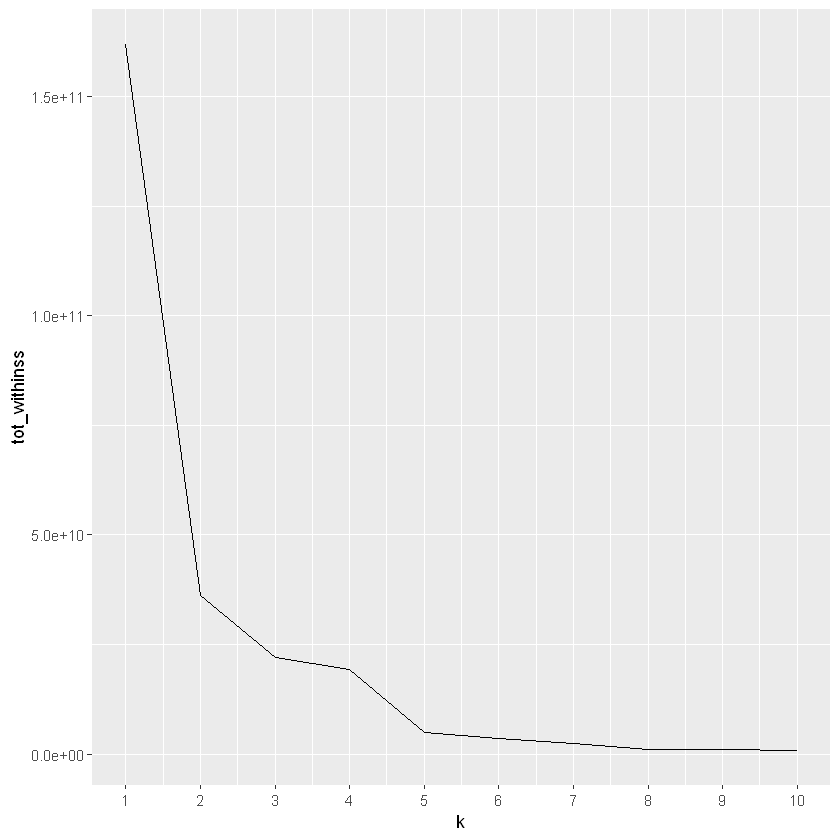

In [11]:
library(purrr)

# Use map_dbl to run many models with varying value of k (centers)
tot_withinss <- map_dbl(1:10,  function(k){
  model <- kmeans(x = oes, centers = k)
  model$tot.withinss
})

# Generate a data frame containing both k and tot_withinss
elbow_df <- data.frame(
  k = 1:10,
  tot_withinss = tot_withinss
)

# Plot the elbow plot
ggplot(elbow_df, aes(x = k, y = tot_withinss)) +
  geom_line() +
  scale_x_continuous(breaks = 1:10)

### K-means: Average Silhouette Widths
So hierarchical clustering resulting in 3 clusters and the elbow method suggests 2. In this exercise use average silhouette widths to explore what the "best" value of k should be.

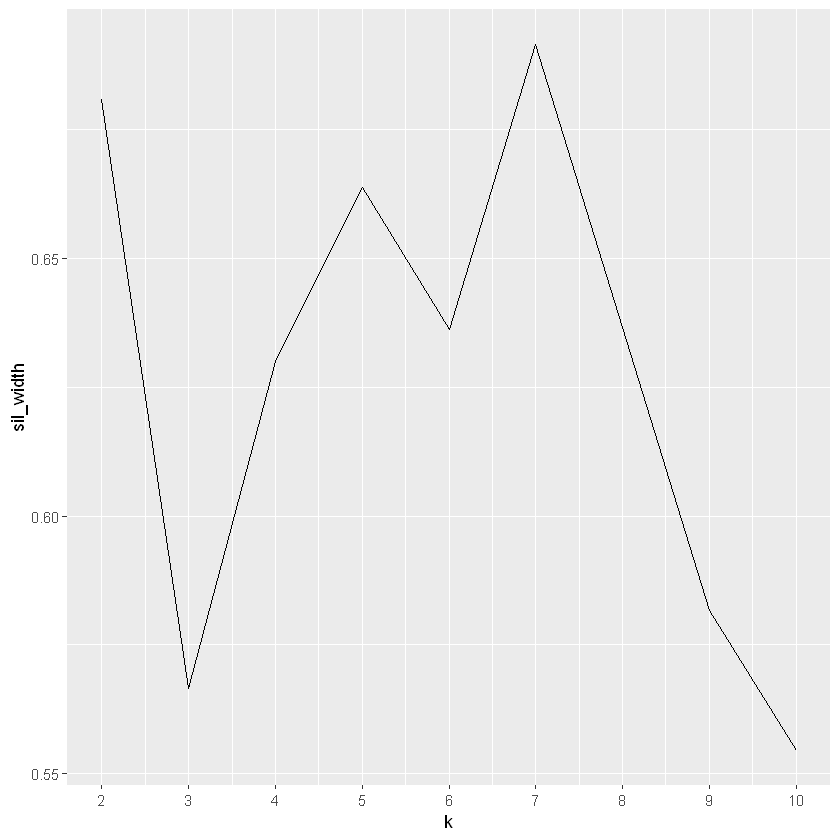

In [13]:
library(cluster)

# Use map_dbl to run many models with varying value of k
sil_width <- map_dbl(2:10,  function(k){
  model <- pam(oes, k = k)
  model$silinfo$avg.width
})

# Generate a data frame containing both k and sil_width
sil_df <- data.frame(
  k = 2:10,
  sil_width = sil_width
)

# Plot the relationship between k and sil_width
ggplot(sil_df, aes(x = k, y = sil_width)) +
  geom_line() +
  scale_x_continuous(breaks = 2:10)